<a href="https://colab.research.google.com/github/obeabi/Bayesian_AB_Testing/blob/main/Greedy_Epsilon_RealValuedReward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initalize constant
NUM_TRIALS = 10000
EPS = 0.1

## Bandit Arm Class

In [3]:
class BanditArm:
  def __init__(self, m):
    self.m = m
    self.m_estimate = 0
    self.N = 0

  # our reward is gaussian distributed with mean m and varaiance sigma squared
  def pull(self):
    return np.random.randn() + self.m  # drawing a sample from the gaussian distribution with mean m and varaince of 1

  def update(self, x):
    self.N += 1
    self.m_estimate = (1 - 1.0/self.N)*self.m_estimate + 1.0/self.N*x
    #self.m_estimate = self.m_estimate + (( x - self.m_estimate )/ self.N)

## Create experiment

In [4]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [BanditArm(m1), BanditArm(m2), BanditArm(m3)]

  # count number of suboptimal choices
  means = np.array([m1, m2, m3])
  true_best = np.argmax(means)
  count_suboptimal = 0

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(len(bandits)) # can use randint
    else:
      j = np.argmax([b.m_estimate for b in bandits])

    x = bandits[j].pull()
    bandits[j].update(x)
    
    if j != true_best:
      count_suboptimal += 1

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.m_estimate)

  print("percent suboptimal for epsilon = %s:" % eps, float(count_suboptimal) / N)

  return cumulative_average


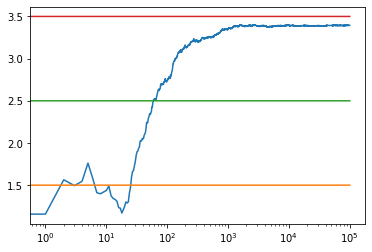

1.497622635187657
2.493256883163975
3.495185054892778
percent suboptimal for epsilon = 0.1: 0.06692


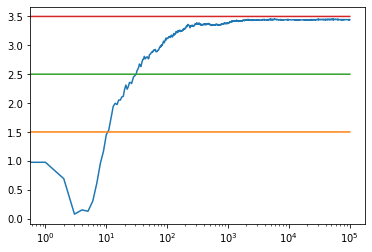

1.485909892566362
2.4900836611730544
3.495626404344108
percent suboptimal for epsilon = 0.05: 0.0338


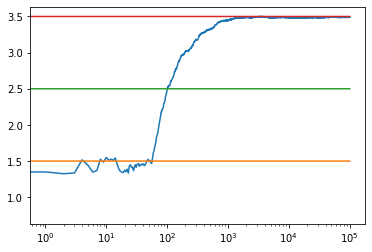

1.5025069492497611
2.496882294104375
3.5000934485079536
percent suboptimal for epsilon = 0.01: 0.00751


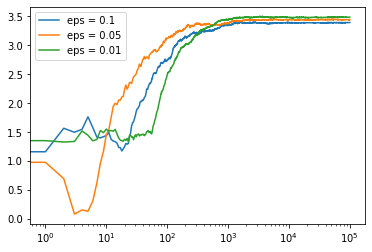

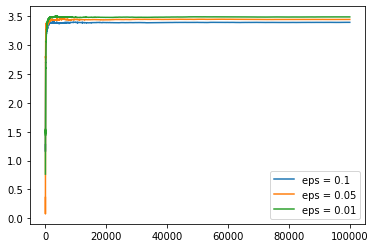

In [5]:
if __name__ == '__main__':
  m1, m2, m3 = 1.5, 2.5, 3.5
  c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
  c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
  c_01 = run_experiment(m1, m2, m3, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()

## Allowing for cooling schedule

In [9]:
# Initalize constant
NUM_TRIALS = 10000
e_0 = 0.1
k   = 1
alpha = 2
a = 0.1
b = 0.1
c = 0.04
e_min = 0.08


## Bandit Arm Class

In [10]:
class BanditArm:
  def __init__(self, m):
    self.m = m
    self.m_estimate = 0
    self.N = 0

  # our reward is gaussian distributed with mean m and varaiance sigma squared
  def pull(self):
    return np.random.randn() + self.m  # drawing a sample from the gaussian distribution with mean m and varaince of 1

  def update(self, x):
    self.N += 1
    self.m_estimate = (1 - 1.0/self.N)*self.m_estimate + 1.0/self.N*x
    #self.m_estimate = self.m_estimate + (( x - self.m_estimate )/ self.N)

## Create experiment

In [8]:
# Define Cooling schedule
def update_EPS(t):
      #return max(e_0 - k*t, e_min)
      return e_0 * np.power(alpha, t*0)

In [15]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [BanditArm(m1), BanditArm(m2), BanditArm(m3)]

  # count number of suboptimal choices
  means = np.array([m1, m2, m3])
  true_best = np.argmax(means)
  count_suboptimal = 0

  data = np.empty(N)
  epsilon_ = np.zeros(N)
  
  for i in range(N):

    # epsilon greedy
    p = np.random.random()
    # estimate epsilon
    #eps_ = max(eps - k*i, e_min)
    eps_ = eps * np.power(alpha, i*0)

    if p < eps_:
      j = np.random.choice(len(bandits))
    else:
      j = np.argmax([b.m_estimate for b in bandits])

    x = bandits[j].pull()
    bandits[j].update(x)
    # update the EPS for the bandit whose arm we just pulled
  

    if j != true_best:
      count_suboptimal += 1

    # for the plot
    data[i] = x
    epsilon_[i] = eps_
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.m_estimate)

  print("percent suboptimal for epsilon = %s:" % eps, float(count_suboptimal) / N)

  return cumulative_average


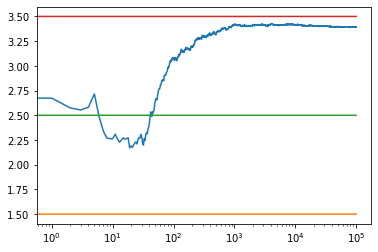

1.5189205791328426
2.476755884312113
3.494709711933961
percent suboptimal for epsilon = 0.1: 0.06775


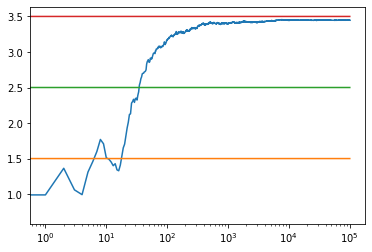

1.4400338327973254
2.477543197528577
3.4994651508012558
percent suboptimal for epsilon = 0.05: 0.03405


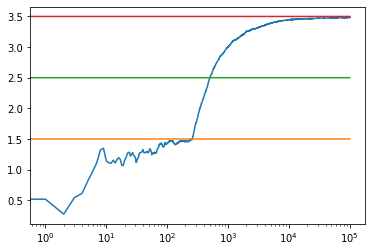

1.5668309661413542
2.473928673442862
3.4973946866661803
percent suboptimal for epsilon = 0.01: 0.00914


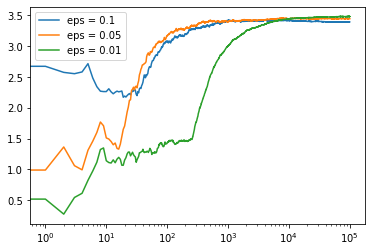

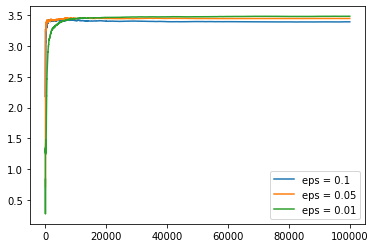

In [16]:
if __name__ == '__main__':
  m1, m2, m3 = 1.5, 2.5, 3.5
  c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
  c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
  c_01 = run_experiment(m1, m2, m3, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()